<a href="https://colab.research.google.com/github/BrothaaEww/Custom-Deep-Learning-Models/blob/main/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D,GlobalAveragePooling2D,Flatten

from keras.layers import BatchNormalization

from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Dense,Dropout,Activation

from keras.src.utils.np_utils import to_categorical

import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import random

# from keras.utils import np_utils

from keras.callbacks import History



In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /= 255
x_test /= 255

print("Training matrix shape:",x_train.shape)
print("Testing matrix shape:",x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Training matrix shape: (60000, 28, 28, 1)
Testing matrix shape: (10000, 28, 28, 1)


In [ ]:
nb_classes=10
y_train=to_categorical(y_train,nb_classes)
y_test=to_categorical(y_test,nb_classes)

In [ ]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
convLayer01=Activation('relu')
model.add(convLayer01)



In [ ]:
model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer02=MaxPooling2D(pool_size=(2,2))
model.add(convLayer02)

model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis=-1))
convLayer03=Activation('relu')
model.add(convLayer03)

model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer04=MaxPooling2D(pool_size=(2,2))
model.add(convLayer04)
model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)       

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
gen=ImageDataGenerator(rotation_range=8,width_shift_range=0.08,shear_range=0.3,height_shift_range=0.08,zoom_range=0.08)
test_gen=ImageDataGenerator()

In [ ]:
train_generator=gen.flow(x_train,y_train,batch_size=128)
test_generator=test_gen.flow(x_test,y_test,batch_size=128)

In [ ]:
history = History()


In [ ]:
history=model.fit(train_generator,steps_per_epoch=60000//128,epochs=5,verbose=1,validation_data=test_generator,validation_steps=10000//128)

Epoch 1/5
468/468 [==============================] - 166s 352ms/step - loss: 0.3004 - accuracy: 0.9061 - val_loss: 0.0482 - val_accuracy: 0.9855
Epoch 2/5
468/468 [==============================] - 165s 352ms/step - loss: 0.0547 - accuracy: 0.9827 - val_loss: 0.0257 - val_accuracy: 0.9921
Epoch 3/5
468/468 [==============================] - 166s 354ms/step - loss: 0.0423 - accuracy: 0.9869 - val_loss: 0.0203 - val_accuracy: 0.9931
Epoch 4/5
468/468 [==============================] - 166s 354ms/step - loss: 0.0355 - accuracy: 0.9885 - val_loss: 0.0382 - val_accuracy: 0.9863
Epoch 5/5
468/468 [==============================] - 166s 354ms/step - loss: 0.0306 - accuracy: 0.9895 - val_loss: 0.0223 - val_accuracy: 0.9922


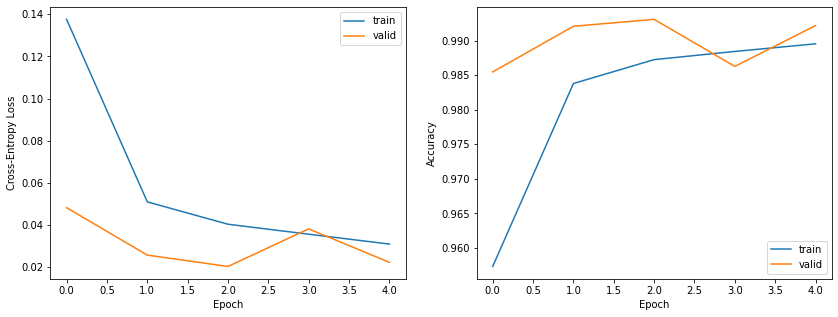

In [ ]:
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
tf_